<a href="https://colab.research.google.com/github/woo2201/sampleCases/blob/reservior/UnsupervisedAnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import numpy as np
import pandas as pd
import glob, os
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
cd /content/drive/MyDrive/dataset/open/

/content/drive/MyDrive/dataset/open


In [27]:
path = "/content/drive/MyDrive/dataset/open/"
filenames = glob.glob(path + "*.csv")
data = [var.split('.')[0].split('/')[-1] for var in filenames]

# dynamically allocate df names.
df_list = []
for name in zip(filenames, data):
    loc = list(name)[0]
    vld = list(name)[1]
    df_list.append(vld)
    globals()[vld] = pd.read_csv(loc) # encoding = 'ISO-8859-1'

In [28]:
filenames

['/content/drive/MyDrive/dataset/open/sample_submission.csv',
 '/content/drive/MyDrive/dataset/open/val.csv',
 '/content/drive/MyDrive/dataset/open/test.csv',
 '/content/drive/MyDrive/dataset/open/train.csv']

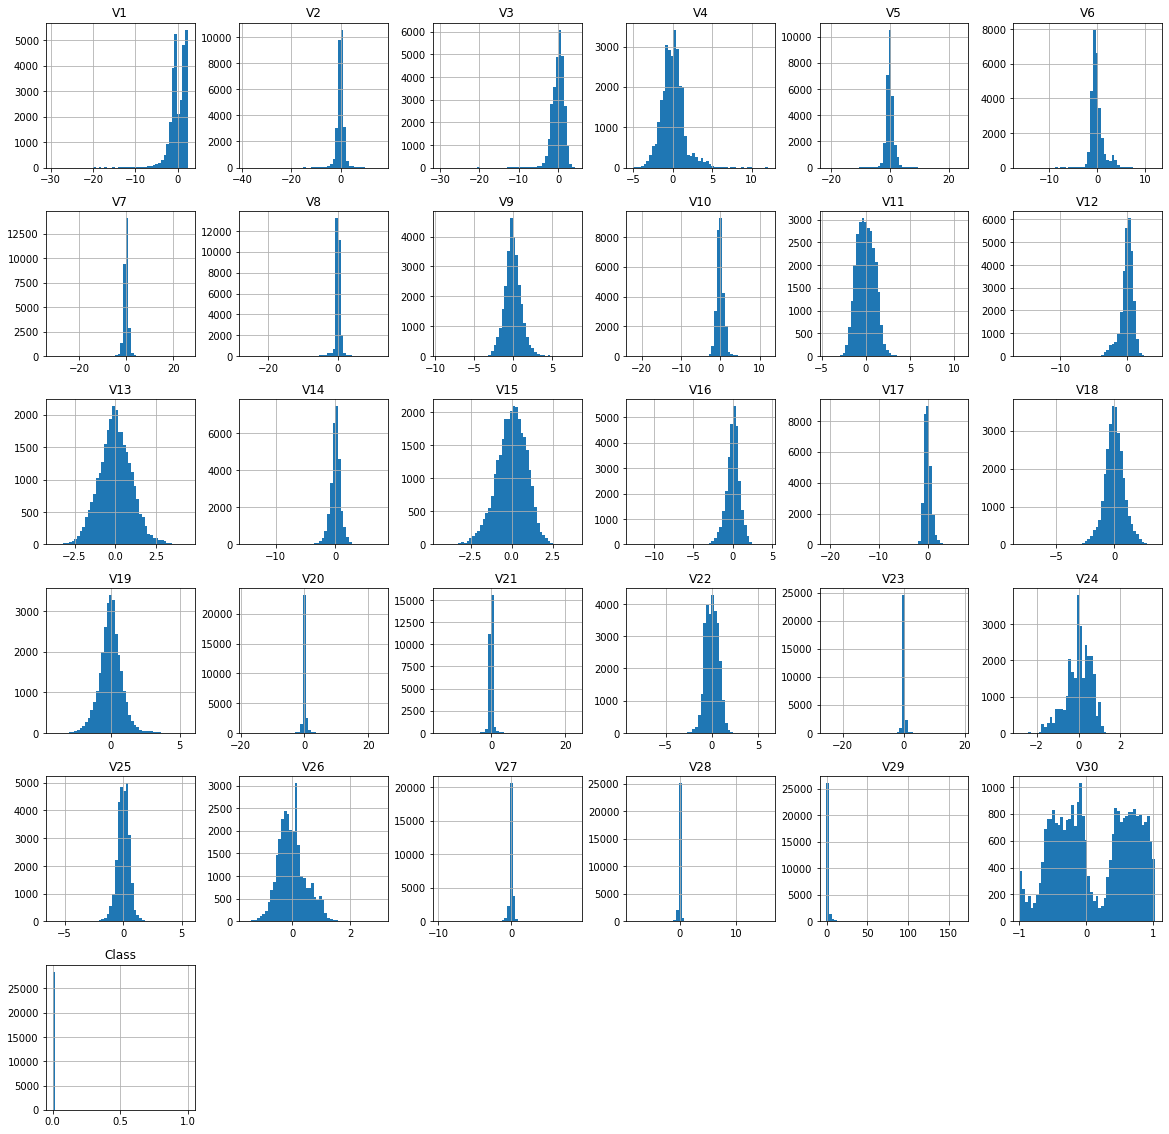

In [30]:
val.iloc[:,1:].hist(bins = 50, figsize = (20,20))
plt.show()

In [57]:
X = val.iloc[:,1:31]
y = val['Class']
df = train.drop(['ID'], axis = 1).sample(X.shape[0], random_state = 42)

In [47]:
print(X.shape)
print(y.shape)

(28462, 30)
(28462,)


I am assuming V30 is time-related value

In [48]:
classifiers = {
                "ISOLATION FOREST": IsolationForest(n_estimators=155, max_samples = len(X), contamination=.00194,random_state=42, verbose=0),
                "LOCAL OUTLIER FACTOR": LocalOutlierFactor(n_neighbors=200, algorithm='auto', leaf_size=230, metric='euclidean', p=1, metric_params=None, contamination=.0021),
                "ONE CLASS SVM":OneClassSVM(kernel='rbf', degree=3, gamma = 'auto', nu=0.00215, max_iter=-1)
}

In [58]:
for i, (clf_name, clf) in enumerate(classifiers.items()):

    #Fit the data and tag outliers
    if clf_name == "LOCAL OUTLIER FACTOR":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_

    elif clf_name == "ONE CLASS SVM":
        clf.fit(X)
        y_pred = clf.predict(X)

    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    
    # Run Classification Metrics
    print("{} number of errors: {}".format(clf_name, n_errors))
    print(pd.crosstab(y, y_pred)) 
    print('silhouette coefficient:',round(metrics.silhouette_score(df, y_pred, metric='euclidean'), 3))
    print('Adjusted Rand index   :',round(metrics.adjusted_rand_score(y, y_pred),3))
    print("Classification Report :") 
    print(classification_report(y,y_pred))

ISOLATION FOREST number of errors: 56
col_0      0   1
Class           
0      28391  41
1         15  15
silhouette coefficient: 0.193
Adjusted Rand index   : 0.347
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.27      0.50      0.35        30

    accuracy                           1.00     28462
   macro avg       0.63      0.75      0.67     28462
weighted avg       1.00      1.00      1.00     28462

LOCAL OUTLIER FACTOR number of errors: 50
col_0      0   1
Class           
0      28392  40
1         10  20
silhouette coefficient: 0.126
Adjusted Rand index   : 0.443
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.33      0.67      0.44        30

    accuracy                           1.00     28462
   macro avg       0.67      0.83      0.72     28462
weighted avg     